## Verkeersimulatie Rechte weg

Voor het eerste gedeelte hebben we de gegevens tijd en positie.
Om de snelheid van de auto's te kunnen bereken hebben we een afgelegde afstandt nodig.
Met een afstand en tijd kunnen we dan de snelheid berekenen.

T = tijd,
P = positie,
S = snelheid,
A = afstandt

$D = P2 - P1$

$S = D / T$

(T is in dit geval 0.1)

Eerst maak ik een grafiek van de posities van de auto's in de tijd.
Daarna maak ik een grafiek van hoe snel de auto's rijden.

imports

In [266]:
# Verkeersimulatie rechte weg.
import matplotlib.pyplot as plt
import numpy as np
import csv

lees de csv file in.

In [267]:
with open('verkeerssimulatie-rechteweg-posities.csv', "r") as f:
    reader = csv.reader(f, delimiter=';')
    car_list = list(reader)

Zet de tijd, en de afgelegde afstand in aparte lijsten.

In [268]:
time = []
car1 = []
car2 = []
for i in range(len(car_list)):
    time.append(float(car_list[i][0]))
    car1.append(float(car_list[i][1]))
    car2.append(float(car_list[i][2]))

maak van de python lijsten numpy lijsten.

In [269]:
time = np.asarray(time)
car1 = np.asarray(car1)
car2 = np.asarray(car2)

Maak de grafiek van de positie van de auto's.

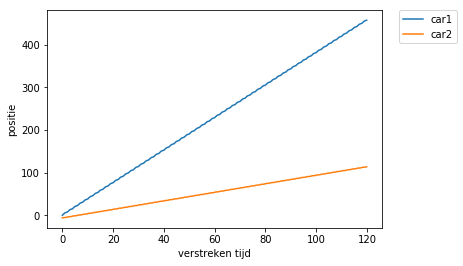

In [270]:
plt.axes()
plt.plot(time, car1, label="car1")
plt.plot(time, car2, label="car2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("verstreken tijd")
plt.ylabel("positie")
plt.show()

functie om de snelheid te berekenen.

In [271]:
def calcSpeed(c):
    distance = []   # distance = position2 - position1
    speed = []      # speed  = distance / time
    for i in range(len(c)-1):
        d = c[i+1] - c[i]
        distance.append(d)
    for j in range(len(distance)):
        s = distance[j] / 0.1
        speed.append(s)
    return speed

functie om de maximum speed te krijgen.

In [272]:
def maxSpeed(s):
    max_s = 0
    for speed in s:
        if speed > max_s:
            max_s = speed
    return max_s

functie om de minimum speed te krijgen.

In [273]:
def minSpeed(s):
    min_s = 100
    for speed in s:
        if speed < min_s:
            min_s = speed
    return min_s

de lijsten met de snelheid worden aangemaakt.

In [274]:
speed_time = time[:-1]
speed_car1 = calcSpeed(car1)
speed_car2 = calcSpeed(car2)
np_speed_car1 = np.asarray(speed_car1)
np_speed_car2 = np.asarray(speed_car2)

Grafiek met de snelheid van de auto's.

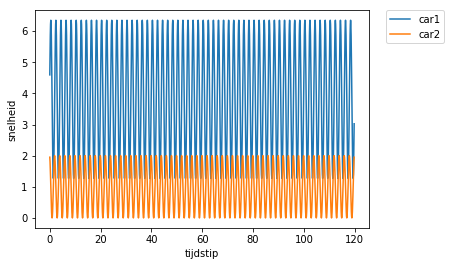

In [275]:
plt.axes()
plt.plot(speed_time, np_speed_car1, label="car1")
plt.plot(speed_time, np_speed_car2, label="car2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("tijdstip")
plt.ylabel("snelheid")
plt.show()

Het blijft moeilijk om te zien wat de precieze max en min snelheid van de auto's zijn.
Daarvoor gebruik ik de lijst, met snelheid informatie, en de funties om de min en de max te vinden.
Die worden dan geprint.

In [276]:
print("max snelheid auto 1: " + str(maxSpeed(speed_car1)))
print("min snelheid auto 1: " + str(minSpeed(speed_car1)))
print()
print("max snelheid auto 2: " + str(maxSpeed(speed_car2)))
print("min snelheid auto 2: " + str(minSpeed(speed_car2)))

max snelheid auto 1: 6.3500000000004775
min snelheid auto 1: 1.269999999999527

max snelheid auto 2: 2.0000000000000284
min snelheid auto 2: 0.0


### Deel 2

Hier gaan we kijken aan de hand van de startpositie en snelheid van de auto's, waneer de eerste botsing plaats vind. Ook gaan we kijken welke auto's als eerste tegen elkaar botsen. De auto's zijn 2 meter lang.

Eerst maak ik een grafiek van de gegeven gegevens.

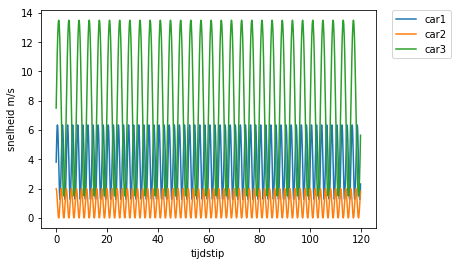

In [277]:

with open('verkeerssimulatie-rechteweg-snelheden.csv', "r") as f2:
    reader2 = csv.reader(f2, delimiter=';')
    car_list2 = list(reader2)

pos1 = float(car_list2[0][1])
pos2 = float(car_list2[0][2])
pos3 = float(car_list2[0][3])
time2 = []
car1 = []
car2 = []
car3 = []
for i in range(len(car_list)-1):  
    time2.append(float(car_list2[i+1][0]))
    car1.append(float(car_list2[i+1][1]))
    car2.append(float(car_list2[i+1][2]))
    car3.append(float(car_list2[i+1][3]))

np_time2 = np.asarray(time2)
np_car1 = np.asarray(car1)
np_car2 = np.asarray(car2)
np_car3 = np.asarray(car3)

plt.axes()
plt.plot(np_time2, np_car1, label="car1")
plt.plot(np_time2, np_car2, label="car2")
plt.plot(np_time2, np_car3, label="car3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("tijdstip")
plt.ylabel("snelheid m/s")
plt.show()

Maar voordat we er berekend kan worden waneer de eerste botsing is moeten we eerst berekenen wat de posities van de auto's zijn.

We hebben de begin posities dus we moeten alleen weten wat de afstandt is die elke auto aflegt. Dat kan berekend worden met deze formule.

A = afstand, S = snelheid, T = time.

$A = S x T$

De afstand doen we dan + de startpositie. Op die manier kan de positie van de auto's bepaalt worden.

De posities ga ik nu berekenen en laten zien in een nieuwe grafiek. Ik ga uit dat de afstand in van m/s.

In [278]:
def calcDistance(c):
    distance = []   # distance = speed * time
    for i in range(len(c)):
        d = c[i] * 0.1
        distance.append(d)
    return distance

In [279]:
def calcPosition(s,c):
    position = []   # position = start + distance
    position.append(s)
    for i in range(len(c)):
        s += c[i] 
        position.append(s)
    return position

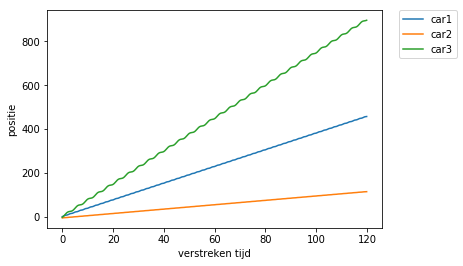

In [280]:
dist_car1 = calcDistance(car1)
dist_car2 = calcDistance(car2)
dist_car3 = calcDistance(car3)

pos_car1 = calcPosition(pos1, dist_car1) 
pos_car2 = calcPosition(pos2, dist_car2)
pos_car3 = calcPosition(pos3, dist_car3)

time2.append(time2[-1]+0.1)
np_time2 = np.asarray(time2)
np_pos_car1 = np.asarray(pos_car1)
np_pos_car2 = np.asarray(pos_car2)
np_pos_car3 = np.asarray(pos_car3)

plt.axes()
plt.plot(np_time2, np_pos_car1, label="car1")
plt.plot(np_time2, np_pos_car2, label="car2")
plt.plot(np_time2, np_pos_car3, label="car3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("verstreken tijd")
plt.ylabel("positie")
plt.show()

Nu kunnen we de posities van de auto's duidelijk zien. Als we inzoomen op het begin van de grafiek kunnen we ook zien waneer de eerste botsing plaats vind.

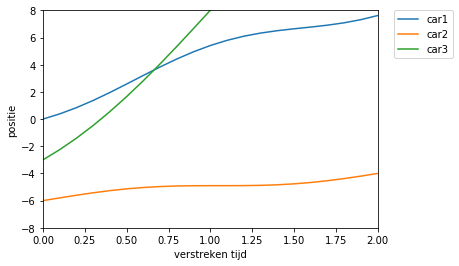

In [281]:
plt.axes()
plt.plot(np_time2, np_pos_car1, label="car1")
plt.plot(np_time2, np_pos_car2, label="car2")
plt.plot(np_time2, np_pos_car3, label="car3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# inzoomen op het eerste gedeelte van de grafiek waar de eerste botsing plaats vind.
plt.xlabel("verstreken tijd")
plt.ylabel("positie")
plt.xlim((0,2))
plt.ylim((-8,8))
plt.show()

Nu kunnen we makelijke bepalen dat car1 en car3 met elkaar zullen botsen.

In [282]:
def timeOfCrash(t, c1, c2, c3):
    for i in range(len(t)):
        if c1[i] - c2[i] < 2 and c1[i] - c2[i] > 0:
            print("Botsing op: " + str(t[i]) + " met car1 en car2")
            print("positie car1: " + str(c1[i]))
            print("positie car2: " + str(c2[i]))
            print("afstand tussen auto's: " + str(c1[i] - c2[i]))
            break
        if c1[i] - c3[i] < 2 and c1[i] - c3[i] > 0:
            print("Botsing op: " + str(t[i]) + " met car1 en car3")
            print("positie car1: " + str(c1[i]))
            print("positie car3: " + str(c3[i]))
            print("afstand tussen auto's: " + str(c1[i] - c3[i]))
            break
        if c2[i] - c3[i] < 2 and c2[i] - c3[i] > 0:
            print("Botsing op: " + str(t[i]) + " met car2 en car3")
            print("positie car2: " + str(c2[i]))
            print("positie car3: " + str(c3[i]))
            print("afstand tussen auto's: " + str(c2[i] - c3[i]))
            break

In [283]:
timeOfCrash(time2, pos_car1, pos_car2, pos_car3)

Botsing op: 0.3 met car1 en car3
positie car1: 1.3707877707
positie car3: -0.4707291243999999
afstand tussen auto's: 1.8415168950999998


De botsing tussen car1 en car3 vind plaats op 0.3 omdat de auto's 2 meter lang zijn. De positie wordt gemeten bij de voorste kant van de auto dus moet er achter die positie nog 2 meter vrij zijn. Bij 0.3 is dat niet meer het geval dus zijn de auto's tegenelkaar gebotst.

De reden dat ik voor de voorkant van de auto heb gekozen als meetpunt is omdat dat ook word gedaan bij wedstrijden.